In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import regions
from astropy.table import *
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS

In [2]:
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### load tables

In [26]:
ch = 'CH1'
cat = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_'+ch+'_newfluxes_errmod.fits')

useful_params =['MAG_APER','MAG_APER_1','MAG_APER_2','MAG_APER_3','MAG_APER_4','MAG_APER_5','MAG_APER_6','MAG_APER_7',
               'MAG_AUTO','ALPHA_J2000','DELTA_J2000']
cat = cat[useful_params]

for param in useful_params:
    cat.rename_column(param,param+'_'+ch)
cat.write('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_'+ch+'_trim.fits',overwrite=True)

In [67]:
cat = Table.read('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted.fits')
useful_params =['ALPHA_J2000','DELTA_J2000','IRAC_CH1_MAG','IRAC_CH2_MAG','HSC_i_MAG_AUTO','HSC_r_MAG_AUTO','HSC_z_MAG_AUTO']
cat = cat[useful_params]
for param in useful_params:
    cat.rename_column(param,param+'_'+'cosmos')
cat.write('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim.fits',overwrite=True)

### match with Vincent's catalog

In [14]:
import os

In [79]:
cat_shiraz_ch1_name = '/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_trim.fits'
cat_shiraz_ch2_name = '/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH2_trim.fits'
cat_cosmo2020_photometry_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim.fits'
cat_v8_name = 'COSMOS2020_Laigle_Vincent_added.fits'
combined_cat_name = 'COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits'

#CH1
cmd = 'java -jar stilts.jar tmatch2 in1='+ cat_v8_name + \
                ' in2='+cat_shiraz_ch1_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000_CH1 DELTA_J2000_CH1" out='+combined_cat_name
os.system(cmd)
print(cmd)
cat_added = Table.read(combined_cat_name)
cat_added.remove_columns(['ALPHA_J2000_CH1','DELTA_J2000_CH1','Separation'])
cat_added.write(combined_cat_name,overwrite=True)

#CH2
cmd = 'java -jar stilts.jar tmatch2 in1='+ combined_cat_name + \
                ' in2='+cat_shiraz_ch2_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000_CH2 DELTA_J2000_CH2" out='+combined_cat_name
os.system(cmd)
print(cmd)
cat_added = Table.read(combined_cat_name)
cat_added.remove_columns(['ALPHA_J2000_CH2','DELTA_J2000_CH2','Separation'])
cat_added.write(combined_cat_name,overwrite=True)

# cosmos2020 photo cat
cmd = 'java -jar stilts.jar tmatch2 in1='+ combined_cat_name + \
                ' in2='+cat_cosmo2020_photometry_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000_cosmos DELTA_J2000_cosmos" out='+combined_cat_name
os.system(cmd)
print(cmd)
cat_added = Table.read(combined_cat_name)
cat_added.remove_columns(['ALPHA_J2000_cosmos','DELTA_J2000_cosmos','Separation'])
cat_added.write(combined_cat_name,overwrite=True)


java -jar stilts.jar tmatch2 in1=COSMOS2020_Laigle_Vincent_added.fits in2=/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_trim.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000_CH1 DELTA_J2000_CH1" out=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits
java -jar stilts.jar tmatch2 in1=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits in2=/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH2_trim.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000_CH2 DELTA_J2000_CH2" out=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits
java -jar stilts.jar tmatch2 in1=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000_cosmos DELTA_J2000_cosmos" out=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits


In [80]:
cat_added = Table.read('COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits')
print(cat_added.info)

<Table length=189112>
         name          dtype  unit
--------------------- ------- ----
                   RA float64     
                  DEC float64     
               Z_BEST float64     
                ZPHOT float64     
                 Z_ML float64     
                 ZPDF float32     
          MAG_ABS_NUV float64     
            MAG_ABS_r float64     
           MAG_ABS_Ks float64     
             MASS_MED float64     
      MASS_MED_COSMOS float32     
             SSFR_MED float64     
                    g float64     
                    r float64     
                    i float64     
                    z float64     
             inside_u    bool     
            inside_uS    bool     
             OBJ_TYPE float64     
         MAG_APER_CH1 float32     
       MAG_APER_1_CH1 float32     
       MAG_APER_2_CH1 float32     
       MAG_APER_3_CH1 float32     
       MAG_APER_4_CH1 float32     
       MAG_APER_5_CH1 float32     
       MAG_APER_6_CH1 float32    

### statistics

(-2, 8)

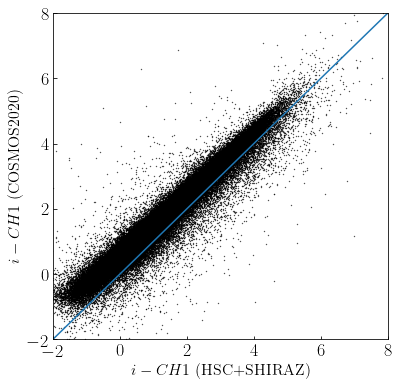

In [63]:
fig = plt.figure(figsize=(6,6))
plt.scatter(cat_added['i'] - cat_added['MAG_APER_CH1'],cat_added['HSC_i_MAG_AUTO_cosmos']-cat_added['IRAC_CH1_MAG_cosmos'],s=0.1,color='k')
plt.xlabel(r'$i-CH1$ (HSC+SHIRAZ)',fontsize=16)
plt.ylabel(r'$i-CH1$ (COSMOS2020)',fontsize=16)
plt.plot([-2,8],[-2,8])
plt.xlim([-2,8])
plt.ylim([-2,8])

(-2, 8)

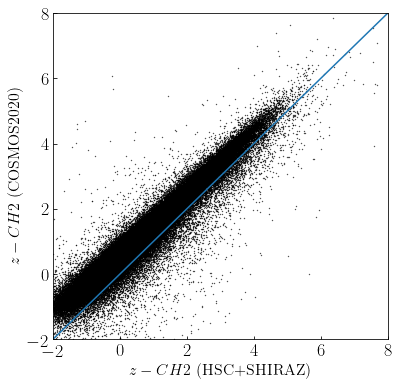

In [70]:
fig = plt.figure(figsize=(6,6))
plt.scatter(cat_added['z'] - cat_added['MAG_APER_CH2'],cat_added['HSC_z_MAG_AUTO_cosmos']-cat_added['IRAC_CH2_MAG_cosmos'],s=0.1,color='k')
plt.xlabel(r'$z-CH2$ (HSC+SHIRAZ)',fontsize=16)
plt.ylabel(r'$z-CH2$ (COSMOS2020)',fontsize=16)
plt.plot([-2,8],[-2,8])
plt.xlim([-2,8])
plt.ylim([-2,8])

In [72]:
cat_added.info

<Table length=189112>
         name          dtype  unit
--------------------- ------- ----
                   RA float64     
                  DEC float64     
               Z_BEST float64     
                ZPHOT float64     
                 Z_ML float64     
                 ZPDF float32     
             MASS_MED float64     
      MASS_MED_COSMOS float32     
             SSFR_MED float64     
                    g float64     
                    r float64     
                    i float64     
                    z float64     
             inside_u    bool     
            inside_uS    bool     
             OBJ_TYPE float64     
         MAG_APER_CH1 float32     
       MAG_APER_1_CH1 float32     
       MAG_APER_2_CH1 float32     
       MAG_APER_3_CH1 float32     
       MAG_APER_4_CH1 float32     
       MAG_APER_5_CH1 float32     
       MAG_APER_6_CH1 float32     
       MAG_APER_7_CH1 float32     
         MAG_AUTO_CH1 float32     
         MAG_APER_CH2 float32    

### SF/Q plots

In [92]:
cat_added_bright = cat_added[cat_added['z']<24]
cat_added_bright = cat_added_bright[cat_added_bright['ZPHOT']>0.7]
cat_added_bright = cat_added_bright[cat_added_bright['ZPHOT']<0.9]
cat_added_bright_sf = cat_added_bright[cat_added_bright['SSFR_MED']>-11]
cat_added_bright_q = cat_added_bright[cat_added_bright['SSFR_MED']<-11]

(0, 7)

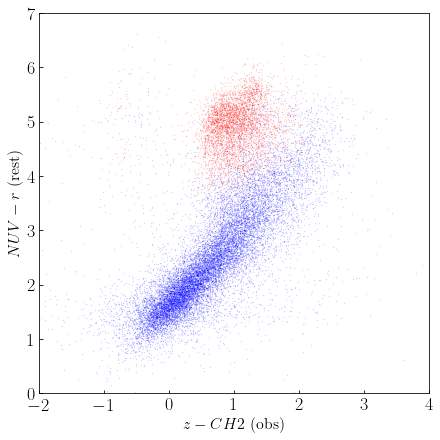

In [94]:
fig = plt.figure(figsize=(7,7))

plt.scatter(cat_added_bright_q['HSC_z_MAG_AUTO_cosmos']-cat_added_bright_q['IRAC_CH2_MAG_cosmos'],
            cat_added_bright_q['MAG_ABS_NUV'] - cat_added_bright_q['MAG_ABS_r'],s=0.05,alpha=0.3,color='r')
plt.scatter(cat_added_bright_sf['HSC_z_MAG_AUTO_cosmos']-cat_added_bright_sf['IRAC_CH2_MAG_cosmos'],
            cat_added_bright_sf['MAG_ABS_NUV'] - cat_added_bright_sf['MAG_ABS_r'],s=0.05,alpha=0.3,color='b')

plt.xlabel(r'$z-CH2$ (obs)',fontsize=16)
plt.ylabel(r'$NUV-r$ (rest)',fontsize=16)

plt.xlim([-2,4])
plt.ylim([0,7])